/opt/conda/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/workspace/kinetics400


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9609375..2.59375].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.4375..2.515625].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8984375..2.46875].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.03125..2.53125].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9921875..2.390625].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.078125..2.375].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0625..2.421875].
Clippin

inputs :  torch.Size([16, 3, 224, 224])
targets :  tensor(216)


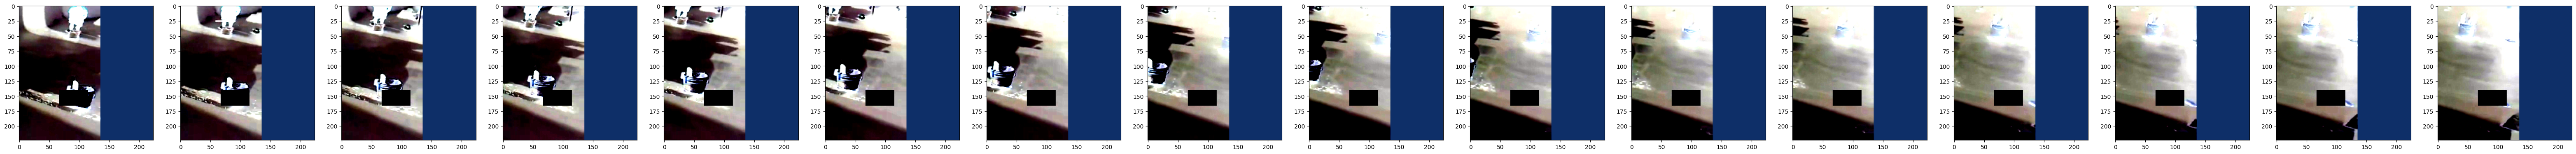

In [1]:
%cd /workspace/kinetics400

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import torch

from src.dataset import CustomDataset

class CustomConfig:
    input_size = 224
    hflip_prob = 0.5
    erase_prob = 0.25
    
    mode = 'supervised'
    
    n_temporal = 5
    n_spatial = 3
    clip_length = 16
    sample_rate = 4
    shortest_edge = 224
    
    view = 'single'
    
    dtype = 'bfloat16'
    
    crop_size = 224
    aa = 'rand-m7-n4-mstd0.5-inc1'
    train_interpolation = 'bicubic'
    
    
args = CustomConfig()

train = pd.read_csv(f"data/Kinetics-400/kinetics400_train_list_videos.txt", sep = " ", header = None)
dataset = CustomDataset(args, df = train, split = "train", is_training = True)

index = np.random.randint(0, len(dataset))
inputs, targets = dataset[index]
inputs = inputs.to(torch.float)

print('inputs : ', inputs.shape)
print('targets : ', targets)

_, axes = plt.subplots(1, inputs.shape[0], figsize = (5 * inputs.shape[0], 5))
for i in range(inputs.shape[0]):
    axes[i].imshow(inputs[i].permute(1, 2, 0))
plt.show()